# TASK1 :Supervised Learning
# GRIP AUG
# DATA SCIENCE AND BUSINESS ANALYTICS CASE STUDY


# AUTHOR: PRANGYA MUDULI

 Problem Statement:

                 Predict the percentage of an student based on the no. of study hours ?

APPROACH: 
     you need to quantify the problem statement to know which ,and what steps you will apply to solve problem.
        
    1.This is a simple linear regression task as it involves just 2 variables.

    2. First step will be importing required libraries.
    
    3. Then reading the data set along with checking NULL values in data set as a part of data cleaning process.

    4. Then univariate and bivariate analysis is done in order to
       deep dive to every features: it will give you insight to implement ideas in future.
        
    5. prepairing the data into train and test.

    6. Model Building.
    
    7. Model prediction.

    8. Model EValuation
 

# importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading data from URL

In [2]:
data= pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head(5) # showing top 5 values

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info() # used to print a concise size of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.shape # checking shape of dataframe

(25, 2)

In [6]:
data.isnull().sum() # checking null values

Hours     0
Scores    0
dtype: int64

Their is NO null values .

# UNIVARIATE ANALYSIS

In [7]:
data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

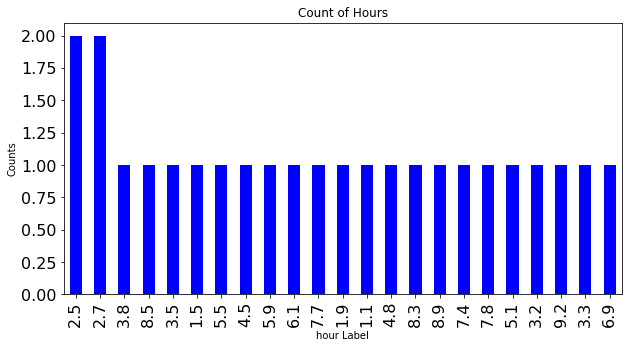

In [8]:
fig = plt.figure(figsize=(10, 5))
df=data['Hours'].value_counts()
ax=df.plot(kind='bar',fontsize=16, color='blue')
plt.title('Count of Hours')
plt.xlabel('hour Label')
plt.ylabel('Counts')
plt.show()

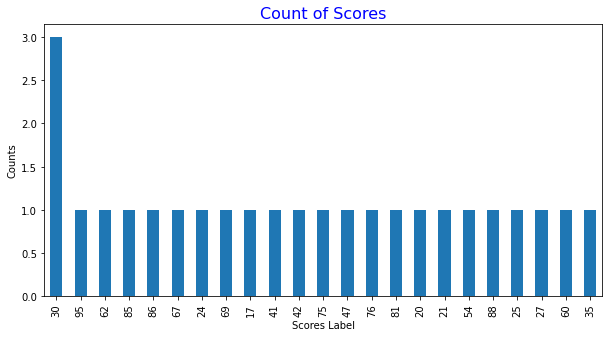

In [9]:
fig = plt.figure(figsize=(10, 5))
data['Scores'].value_counts().plot(kind='bar')
plt.title('Count of Scores', fontsize=16, color='blue')
plt.xlabel('Scores Label')
plt.ylabel('Counts')
plt.show()

insights:
    
    1. Study hours are not repeatative .It ranges from 1.1 hrs to a max of 9.2 hrs.
    
    2. Scores are also ranging from 20 to a max of 88.

# BI-VARIATE ANALYSIS

Lets check what is the relation between Hours and Scores.

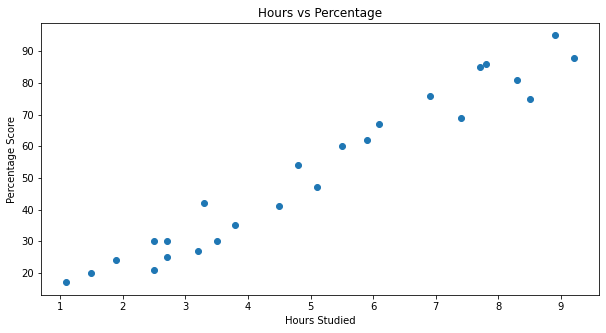

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x='Hours', y='Scores',data=data) # as both are numerical values
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

It means that more the study hours more is percentage of score.

# Prepairing the data

In [11]:
X = data.iloc[:, :-1].values # Predictors
y= data.iloc[:,1].values    # target

# Lets split the data into Train n Test 

In [12]:
# Using Scikit Learn Built in library data is splitted into Train n Test.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Model Building

In [13]:
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()
# Model Fits on Training data
reg.fit(X_train,y_train)

LinearRegression()

now i can check how far the data points follow the regression line using the below plot using formula y= mx+c

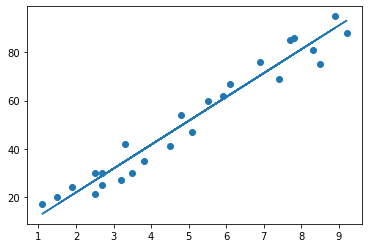

In [14]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
# Model Predicts on Test data
y_predict = reg.predict(X_test)

In [16]:
# Compairing actual vs Predicted output
df = pd.DataFrame({'Actual':y_test ,'Predicted':y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# Predict using your own Data

hours = np.array([9.25])
new_hours= hours.reshape(1, -1)
own_predict = reg.predict(new_hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_predict[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


# MODEL EVALUATION

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. There are many such metrics.

Most prefferer matrix are 1. MAE : Mean Absolute Error
                          2. RMSE :Root mean Square Error

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975


In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_predict))
print('Root mean Square Error:', rms)
      

Root mean Square Error: 4.6474476121003665
